<a href="https://colab.research.google.com/github/zhongwenGit/test-pytorch/blob/main/test-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'/content'

In [3]:
df = pd.DataFrame(data=np.array([[1,2,3],[4,5,6]], dtype=int),columns=['A','B','C'])
df

,A,B,C
0,1,2,3
1,4,5,6


In [7]:
# -*- coding: utf-8 -*-

import torch
import math


dtype = torch.float
device = torch.device("cpu")
#device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')


99 272.4498596191406
199 189.38597106933594
299 132.6361846923828
399 93.8190689086914
499 67.23716735839844
599 49.01304244995117
699 36.504547119140625
799 27.909465789794922
899 21.996780395507812
999 17.924800872802734
1099 15.117445945739746
1199 13.179839134216309
1299 11.841109275817871
1399 10.915216445922852
1499 10.274178504943848
1599 9.829924583435059
1699 9.521736145019531
1799 9.307756423950195
1899 9.159041404724121
1999 9.055597305297852
Result: y = -0.014534752815961838 + 0.8636059165000916 x + 0.002507483586668968 x^2 + -0.09430687874555588 x^3


In [ ]:
# -*- coding: utf-8 -*-
import torch
import math


class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

In [ ]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
print(p)
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')


In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
x = np.linspace(0,5,10)
y = x**3

In [ ]:
from pylab import *

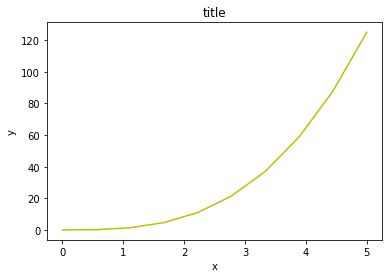

In [ ]:
figure()
plot(x,y,'y')
xlabel('x')
ylabel('y')
title('title')
show()

In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%pyth

In [ ]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [ ]:
single_instance_str = "yellow,white,red,gray"
single_instance_list = single_instance_str.split(',')
print(single_instance_list)

['yellow', 'white', 'red', 'gray']


In [ ]:
print(single_instance_str)
print(single_instance_str[2])
print(single_instance_list)
print(single_instance_list[2])

yellow,white,red,gray
l
['yellow', 'white', 'red', 'gray']
red


In [ ]:
print(single_instance_list)
print(single_instance_list[-1])
print(single_instance_list[-2])

['yellow', 'white', 'red', 'gray']
gray
red


In [ ]:
name = "5,4,8,6,2,9,0,1"
list_1 = name.split(',')
print('name=',name, 'list=',list_1)

name= 5,4,8,6,2,9,0,1 list= ['5', '4', '8', '6', '2', '9', '0', '1']


In [ ]:
list_1.sort()
list_1

['0', '1', '2', '4', '5', '6', '8', '9']

In [ ]:
list_1

['0', '1', '2', '4', '5', '6', '8', '9']

In [ ]:
list_1.reverse()
list_1

['9', '8', '6', '5', '4', '2', '1', '0']

In [ ]:
list_1.append('7')

In [ ]:
list_2 = list_1

In [ ]:
print (list_2)

['9', '8', '6', '5', '4', '2', '1', '0', '7', '7']


In [ ]:
dir(list)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [ ]:
dict(str)

TypeError: 'type' object is not iterable

In [ ]:
numbers = dict(x=5, y=0)
print('numbers = ',numbers)
print(type(numbers))

empty = dict()
print('empty = ',empty)
print(type(empty))

numbers =  {'x': 5, 'y': 0}
<class 'dict'>
empty =  {}
<class 'dict'>


In [ ]:
import pandas as pd
d = {'x1':[1,2,3],'y1':[4,5,6]}
pd1 = pd.DataFrame(data=d)
print(pd1)

   x1  y1
0   1   4
1   2   5
2   3   6


In [ ]:
pd1 +=5
print(pd1)

   x1  y1
0   6   9
1   7  10
2   8  11


In [ ]:
df.dtypes

A    int64
B    int64
C    int64
dtype: object

In [ ]:
pd2 = pd1.T
print(pd1.T)

    0   1   2
x1  6   7   8
y1  9  10  11


In [ ]:
pd2 -=5

In [ ]:
pd2


,0,1,2
x1,1,2,3
y1,4,5,6


In [ ]:
pd1

,x1,y1
0,6,9
1,7,10
2,8,11


In [ ]:
pd1

,x1,y1
0,6,9
1,7,10
2,8,11


In [ ]:
print(pd1)

   x1  y1
0   6   9
1   7  10
2   8  11


In [ ]:
pd1.loc[1].at['y1']

10

In [ ]:
pd1.axes

[RangeIndex(start=0, stop=3, step=1), Index(['x1', 'y1'], dtype='object')]

In [ ]:
pd3 = pd.DataFrame(data={'m':[1,2],'n':[3,4],'k':[5,6]})
print(pd3)
pd3.axes

   m  n  k
0  1  3  5
1  2  4  6


[RangeIndex(start=0, stop=2, step=1), Index(['m', 'n', 'k'], dtype='object')]

In [ ]:
pd3.columns

Index(['m', 'n', 'k'], dtype='object')

In [ ]:
pd3.index('m')


TypeError: 'RangeIndex' object is not callable

In [ ]:
import numpy as np
import pandas as pd

s = pd.Series([1,2,3,np.nan,4,5,6])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
6    6.0
dtype: float64

In [ ]:
dates = pd.date_range('2019-01-01',periods=6)
print(dates)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
df = pd.DataFrame(data=np.random.randn(6,5),index=dates,columns=list('ABCDE'))
df

,A,B,C,D,E
2019-01-01,0.311872,1.073570,0.152922,-0.922180,0.144063
2019-01-02,-0.199640,0.425137,1.095337,-0.550702,0.627226
2019-01-03,-0.413709,0.748343,-0.102069,0.415259,-1.898575
2019-01-04,0.385890,-0.173738,-0.914854,0.193192,1.185781
2019-01-05,-1.566865,0.997040,-0.432706,-1.177076,-1.664432
2019-01-06,-0.818777,0.257455,0.534149,0.324797,-0.828797


In [ ]:
df = pd.DataFrame(data=np.random.randn(4,3),index=[1,2,3,4],columns=list('ABC'))
df

,A,B,C
1,-0.157803,-0.085244,0.999409
2,-0.049590,0.994627,2.500276
3,1.015100,0.075707,-0.587653
4,-0.132468,-0.783599,0.081385


In [ ]:
df2 = pd.DataFrame({'A': [1,2,3,4],
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3]*4 , dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo',
                    'name': [2,4,np.nan,6]})
df2

,A,B,C,D,E,F,name
0,1,2013-01-02,1.0,3,test,foo,2.0
1,2,2013-01-02,1.0,3,train,foo,4.0
2,3,2013-01-02,1.0,3,test,foo,NaN
3,4,2013-01-02,1.0,3,train,foo,6.0


In [ ]:
df2.dtypes


A                int64
B       datetime64[ns]
C              float32
D                int32
E             category
F               object
name           float64
dtype: object

In [ ]:
import numpy as np
import pandas as pd

data = np.zeros((2, ), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])
pd.DataFrame(data)

,A,B,C
0,0,0.0,b''
1,0,0.0,b''


In [ ]:
data[:] = [(1,2,'hello'),(3,4,'world')]

In [ ]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'hello'
1,3,4.0,b'world'


In [ ]:
data2 = data.copy()

In [ ]:
data2

array([(1, 2., b'hello'), (3, 4., b'world')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [ ]:
data = np.ones((3,4))
data

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [ ]:
data = np.zeros((2,10))
data

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
data2 = np.zeros((2,3,2),dtype=np.int16)
data2

array([[[0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0]]], dtype=int16)

In [ ]:
data3 = np.ones((2,1,1),dtype=np.int16)
data3

array([[[1]],

       [[1]]], dtype=int16)

In [ ]:
data1 = np.random.random((2,1,2))
data1

array([[[0.75524545, 0.87721927]],

       [[0.46259145, 0.61026269]]])

In [ ]:
data5 = np.full((3,2,3),17)
data5

array([[[17, 17, 17],
        [17, 17, 17]],

       [[17, 17, 17],
        [17, 17, 17]],

       [[17, 17, 17],
        [17, 17, 17]]])

In [ ]:
dt0 = np.arange(10,26,5)
dt0

array([10, 15, 20, 25])

In [ ]:
x=1
print(x)

1


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("countries.csv")

In [ ]:
data

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [ ]:
data1 = data[data.country =='United States']
data1

,country,year,population
1608,United States,1952,157553000
1609,United States,1957,171984000
1610,United States,1962,186538000
1611,United States,1967,198712000
1612,United States,1972,209896000
1613,United States,1977,220239000
1614,United States,1982,232187835
1615,United States,1987,242803533
1616,United States,1992,256894189
1617,United States,1997,272911760


In [ ]:
data2 = data[data.country=="China"]
data2

,country,year,population
288,China,1952,556263527
289,China,1957,637408000
290,China,1962,665770000
291,China,1967,754550000
292,China,1972,862030000
293,China,1977,943455000
294,China,1982,1000281000
295,China,1987,1084035000
296,China,1992,1164970000
297,China,1997,1230075000


In [ ]:
plt.plot(data1.year,data1.population/10**6)
plt.plot(data2.year,data2.population/10**6)
plt.title("population growth")
plt.xlabel("year")
plt.ylabel("population")
plt.legend(['US','China'])
plt.show()

In [ ]:
a = 1
print (a)

a = 1
print (a)

1


In [ ]:
data1.to_csv("China_csv")

In [ ]:
data2.to_csv("China2_csv")

In [ ]:
data


,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [ ]:
data1.to_csv("test-out")

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("China_csv")

In [ ]:
data

,Unnamed: 0,country,year,population
0,1608,United States,1952,157553000
1,1609,United States,1957,171984000
2,1610,United States,1962,186538000
3,1611,United States,1967,198712000
4,1612,United States,1972,209896000
5,1613,United States,1977,220239000
6,1614,United States,1982,232187835
7,1615,United States,1987,242803533
8,1616,United States,1992,256894189
9,1617,United States,1997,272911760


In [ ]:
data.country


0     United States
1     United States
2     United States
3     United States
4     United States
5     United States
6     United States
7     United States
8     United States
9     United States
10    United States
11    United States
Name: country, dtype: object

In [ ]:
data = data[data.country=="United States"]

In [ ]:
data[data.index==1]

,Unnamed: 0,country,year,population
1,1609,United States,1957,171984000


In [ ]:
data.population


0     157553000
1     171984000
2     186538000
3     198712000
4     209896000
5     220239000
6     232187835
7     242803533
8     256894189
9     272911760
10    287675526
11    301139947
Name: population, dtype: int64

In [ ]:
data.population.mean()
data.std()
data.mean()
data.max()
data.min()

Unnamed: 0             1608
country       United States
year                   1952
population        157553000
dtype: object

In [ ]:
data.population.sum()

2738534790

In [ ]:
data.sum()


Unnamed: 0                                                19362
country       United StatesUnited StatesUnited StatesUnited ...
year                                                      23754
population                                           2738534790
dtype: object

In [ ]:
data.iloc[2,2]

1962

In [ ]:

a = 1



In [ ]:

a = 1



In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

print("aaaaaaaaa", a)
print("xxxxx",x)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

aaaaaaaaa -0.21309983197231408
xxxxx [-3.14159265 -3.13844949 -3.13530633 ...  3.13530633  3.13844949
  3.14159265]
99 818.1250342129134
199 543.9698266814995
299 362.6871622092186
399 242.81389891256248
499 163.54763648195546
599 111.13277608505021
699 76.47342030377504
799 53.55490188436656
899 38.40001874145762
999 28.37884377130942
1099 21.75233620510437
1199 17.370554361218566
1299 14.47309865895667
1399 12.55715444980617
1499 11.290235265810578
1599 10.452484243748707
1699 9.898520909593431
1799 9.532212343384675
1899 9.28999059787963
1999 9.129821332295556
Result: y = 7.343553143321473e-06 + 0.8395523430892139 x + -1.2668851144727626e-06 x^2 + -0.09088547459656844 x^3


In [ ]:
# -*- coding: utf-8 -*-

import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

ModuleNotFoundError: No module named 'torch'